In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os
os.getcwd()

'd:\\local_MDI+\\imodels-experiments\\feature_importance'

In [6]:
df = pd.read_csv("./results/mdi_local.two_subgroups_linear_sims/varying_heritability_sample_row_n/seed331/results.csv")

In [7]:
methods = ["Permutation", "TreeSHAP"]
sample_row_n = df["sample_row_n"].unique().tolist()
sample_row_n.sort()
heritability = df["heritability"].unique().tolist()
heritability.sort()
results = {}
for h in heritability:
    results[h] = {}
    for m in methods:
        results[h][m] = {}
        results[h][m]["auroc_group1"] = []
        results[h][m]["auroc_group2"] = []

In [9]:
for h in heritability:
    for m in methods:
        for s in sample_row_n:
            df_sub = df[(df["fi"] == m) & (df["sample_row_n"] == s) & (df["heritability"] == h)]
            assert len(df_sub["rocauc group2"].unique()) == 1
            assert len(df_sub["rocauc group1"].unique()) == 1
            results[h][m]["auroc_group1"].append(df_sub["rocauc group1"].unique()[0])
            results[h][m]["auroc_group2"].append(df_sub["rocauc group2"].unique()[0])

In [11]:
sample_row_n

[100, 250, 500, 1000]

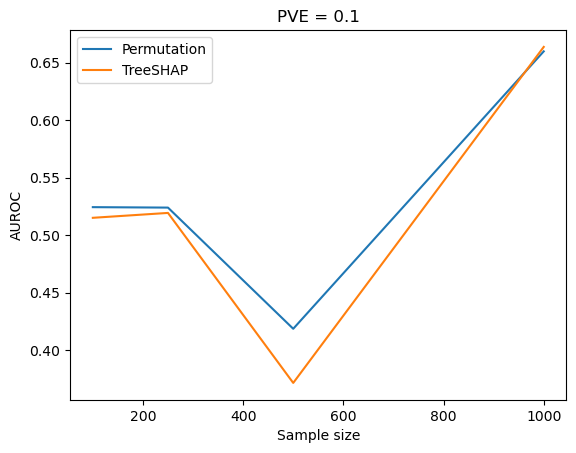

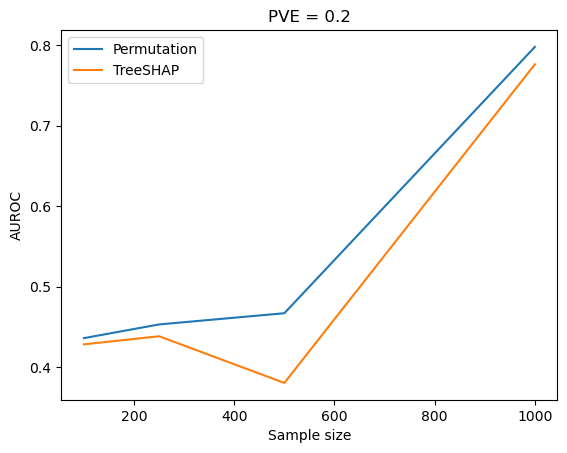

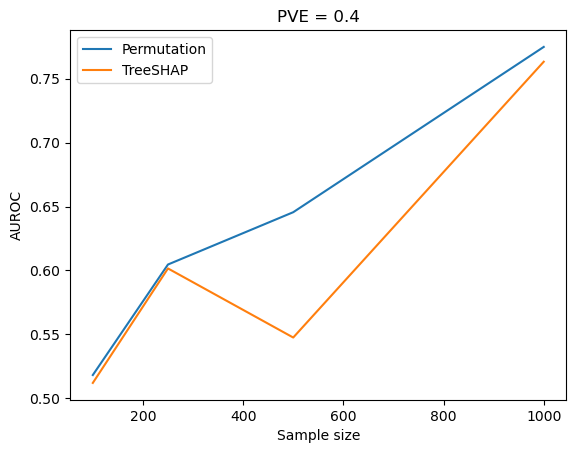

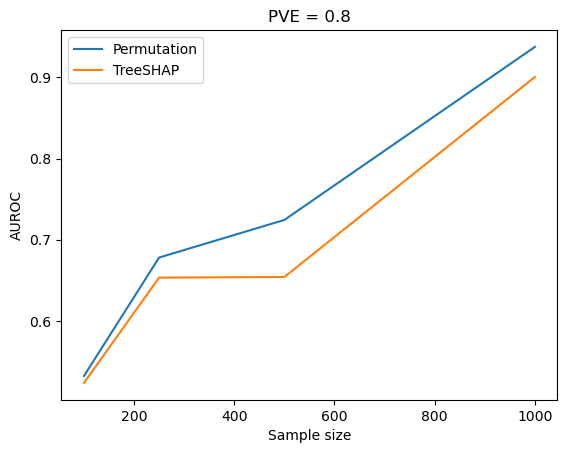

In [15]:
for h in heritability:
    for m in methods:
        plt.plot(sample_row_n, results[h][m]["auroc_group1"], label=m)
    plt.xlabel('Sample size')
    plt.ylabel('AUROC')
    plt.title('PVE = ' + str(h))
    plt.legend()
    plt.show()

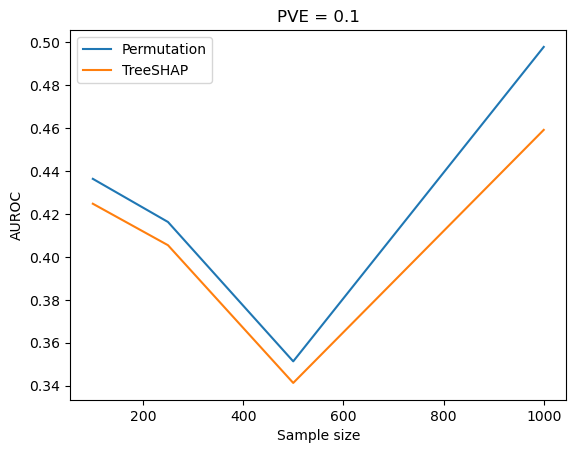

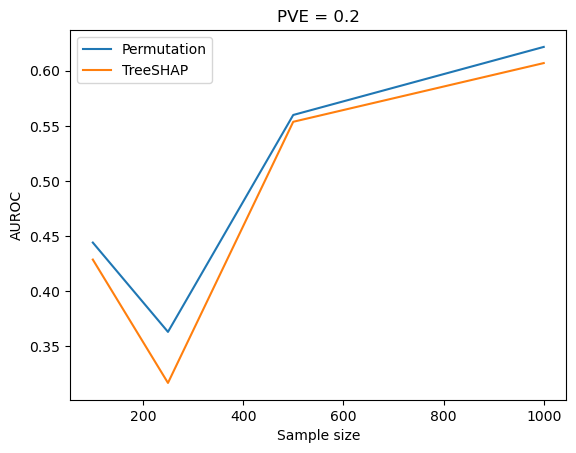

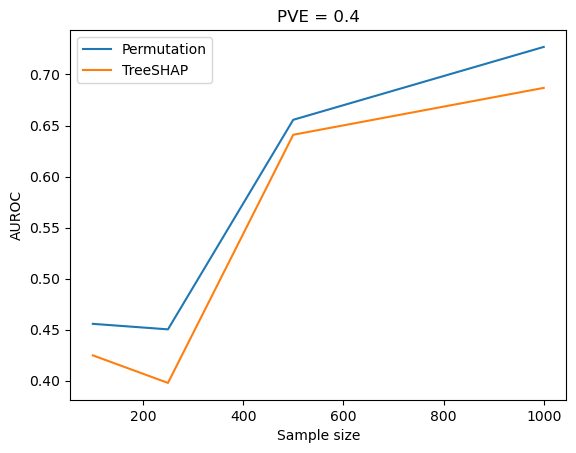

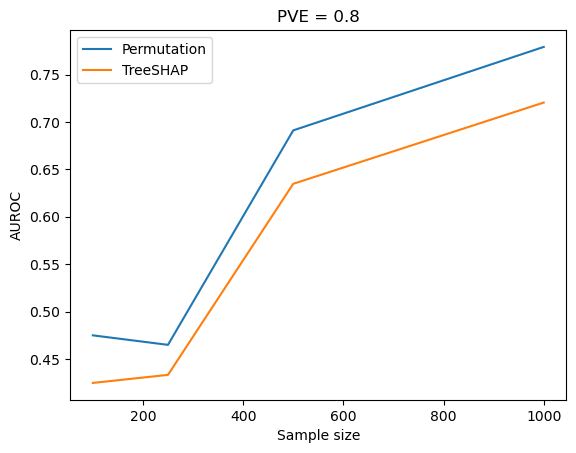

In [16]:
for h in heritability:
    for m in methods:
        plt.plot(sample_row_n, results[h][m]["auroc_group2"], label=m)
    plt.xlabel('Sample size')
    plt.ylabel('AUROC')
    plt.title('PVE = ' + str(h))
    plt.legend()
    plt.show()